# Data Pre-Processing

### Import required libraries

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the dataset

In [266]:
dframe = pd.read_csv('C:\\Users\\SHADOW\\Project\\Disease\\Datasets\\heart_state.csv')

In [267]:
dframe.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [268]:
dframe.shape

(1190, 12)

In [269]:
dframe.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

### Rename the columns

In [271]:
dframe = dframe.rename(columns = {'chest pain type' : 'chest_pain',
                                  'resting bp s' : 'blood_pressure',
                                  'fasting blood sugar' : 'blood_sugar',
                                  'resting ecg' : 'ECG_result',
                                  'max heart rate' : 'max_HR',
                                  'exercise angina' : 'exercise_angina',
                                  'oldpeak' : 'ST_depression',
                                  'ST slope' : 'slope_of_ST',})

In [272]:
dframe.head()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,ECG_result,max_HR,exercise_angina,ST_depression,slope_of_ST,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### Feature Engineering

In [274]:
dframe.isnull().sum()

age                0
sex                0
chest_pain         0
blood_pressure     0
cholesterol        0
blood_sugar        0
ECG_result         0
max_HR             0
exercise_angina    0
ST_depression      0
slope_of_ST        0
target             0
dtype: int64

**Removing Outliers**

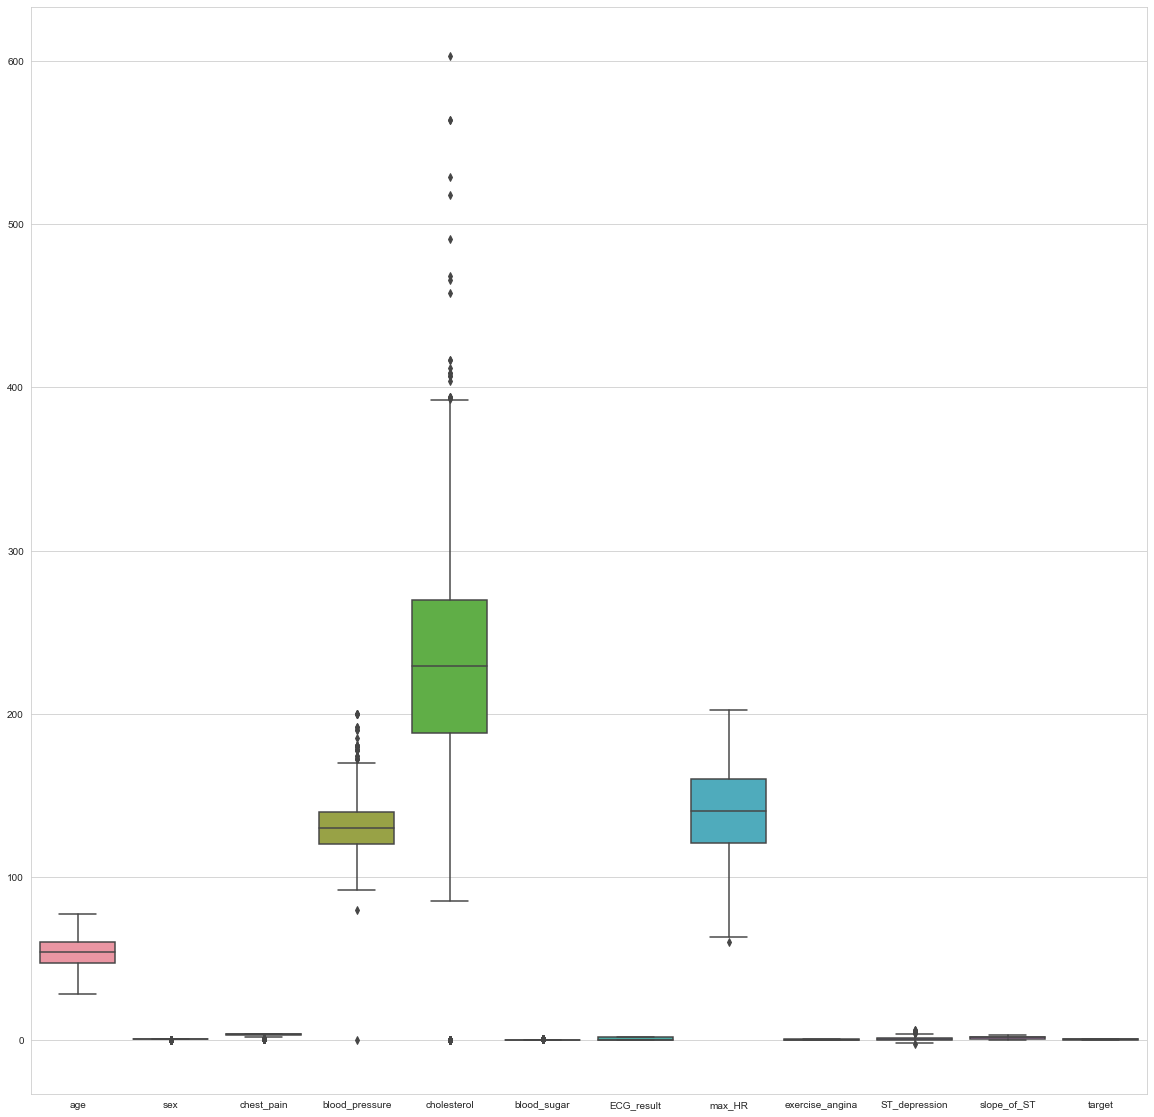

In [275]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=dframe)

In [276]:
#z_score
z = np.abs(stats.zscore(dframe))
print(z)

[[1.46672783 0.55599543 1.31835093 ... 0.84979236 1.02321701 1.05887304]
 [0.50460037 1.79857595 0.24893198 ... 0.07111913 0.61558278 0.94440028]
 [1.78743698 0.55599543 1.31835093 ... 0.84979236 1.02321701 1.05887304]
 ...
 [0.35062404 0.55599543 0.82048698 ... 0.25530143 0.61558278 0.94440028]
 [0.35062404 1.79857595 1.31835093 ... 0.84979236 0.61558278 0.94440028]
 [1.68053393 0.55599543 0.24893198 ... 0.84979236 1.02321701 1.05887304]]


In [277]:
#Quartiles
Q1 = dframe.quantile(0.25)
Q3 = dframe.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                13.00
sex                 0.00
chest_pain          1.00
blood_pressure     20.00
cholesterol        81.75
blood_sugar         0.00
ECG_result          2.00
max_HR             39.00
exercise_angina     1.00
ST_depression       1.60
slope_of_ST         1.00
target              1.00
dtype: float64


In [278]:
dframe = dframe[(z < 3).all(axis=1)]
dframe.shape

(1162, 12)

In [279]:
dframe = dframe[~((dframe < (Q1 - 1.5 * IQR)) |(dframe > (Q3 + 1.5 * IQR))).any(axis=1)]
dframe.shape

(559, 12)

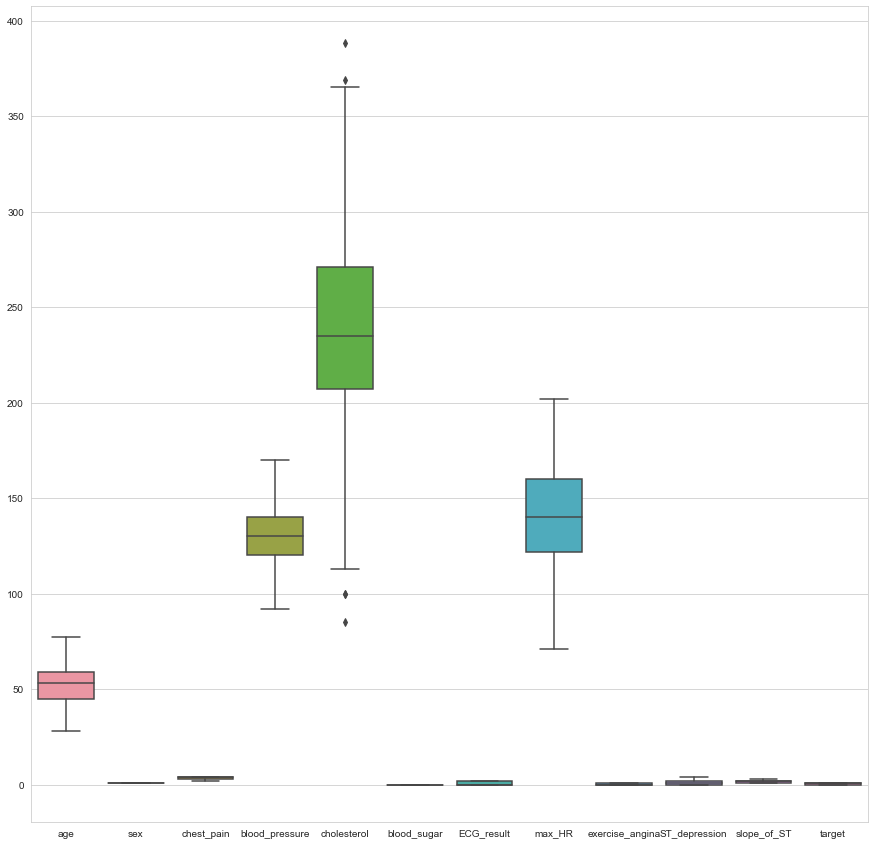

In [280]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(data=dframe)

### Feature Selection

**Heatmap showing correlation**

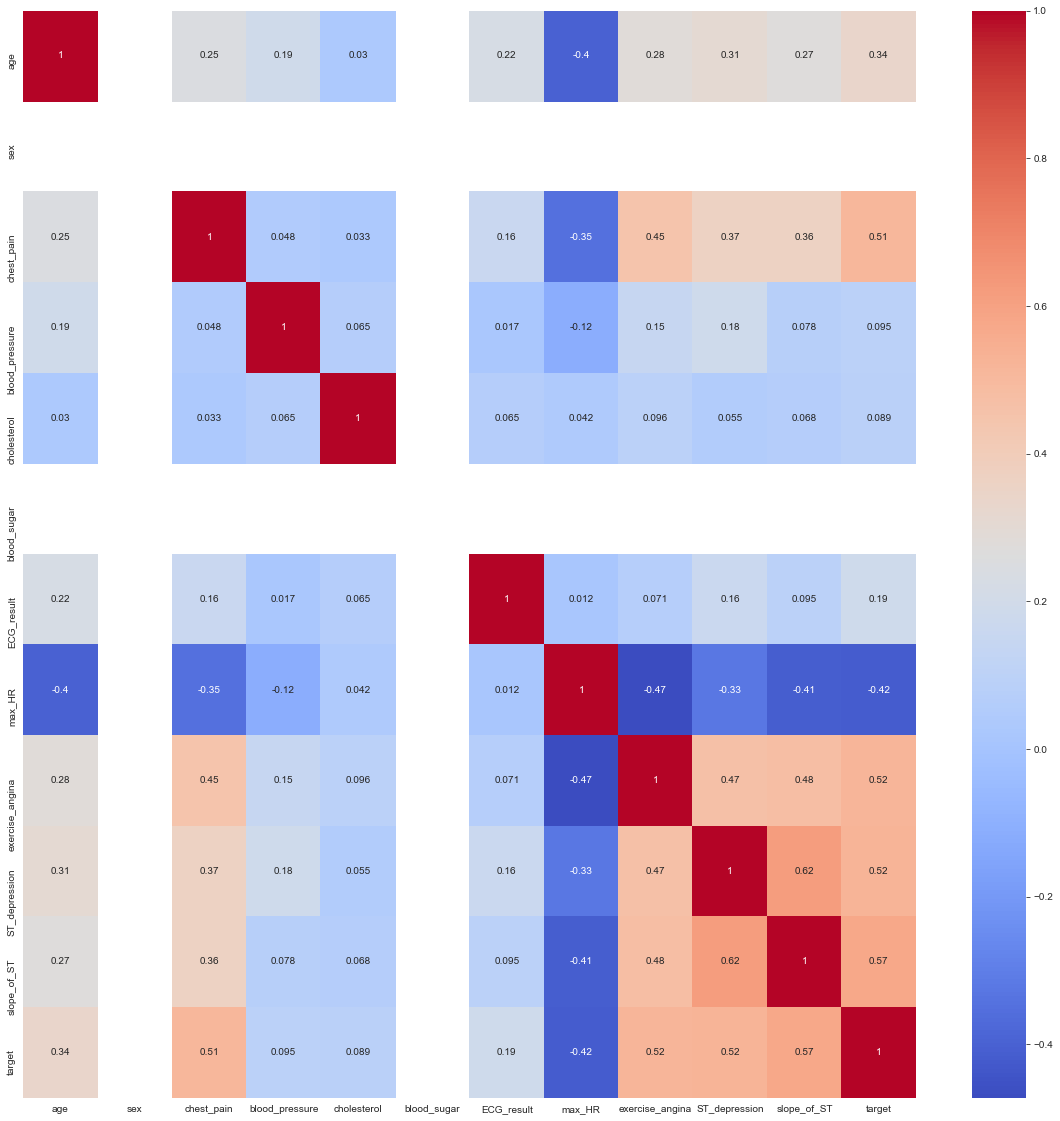

In [281]:
plt.figure(figsize=(20,20))
d = sns.heatmap(dframe.corr(),cmap="coolwarm",annot= True)

_Check whether the target column has approximately equal number zero's and one's_

<AxesSubplot:xlabel='target', ylabel='count'>

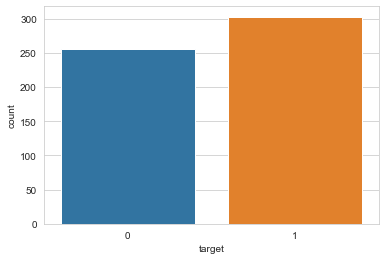

In [283]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=dframe)

Some statistical features:

In [284]:
dframe.describe()

,age,chest_pain,blood_pressure,cholesterol,ECG_result,max_HR,exercise_angina,ST_depression,slope_of_ST,target
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,52.368515,3.363148,130.184258,238.905188,0.677996,140.581395,0.423971,0.964222,1.576029,0.542039
std,9.470581,0.802417,14.972617,48.161913,0.888032,24.967077,0.494628,1.074621,0.590424,0.498676
min,28.000000,2.000000,92.000000,85.000000,0.000000,71.000000,0.000000,-0.100000,1.000000,0.000000
25%,45.000000,3.000000,120.000000,207.000000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,4.000000,130.000000,235.000000,0.000000,140.000000,0.000000,0.600000,2.000000,1.000000
75%,59.000000,4.000000,140.000000,271.000000,2.000000,160.000000,1.000000,1.800000,2.000000,1.000000
max,77.000000,4.000000,170.000000,388.000000,2.000000,202.000000,1.000000,4.000000,3.000000,1.000000


### Type of Values in Each Columns 

* age ------ age in years
* sex ------ 1 = male, 0 = female
* chest pain ------ 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
* blood_pressure ------ 92 to 170
* cholesterol ------ 85 to 388 in mg/dl
* blood_sugar ------ (is >120 mg/dl) (1 = true; 0 = false)
* ECG_result ------ 1 = normal, 2 = having ST-T wave abnormality , 3 = showing probable/definite left ventricular hypertrophy
* max_HR ------ 71 to 202
* exercise_angina ------ (1 = yes; 0 = no)
* ST_depression ------ -0.1 to 4.0
* slope_of_ST ------ 1 = upsloping, 2 = flat, 3 = downsloping


**Find the categorical Features**

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'blood_pressure'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'ECG_result'}>,
        <AxesSubplot:title={'center':'max_HR'}>],
       [<AxesSubplot:title={'center':'exercise_angina'}>,
        <AxesSubplot:title={'center':'ST_depression'}>,
        <AxesSubplot:title={'center':'slope_of_ST'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

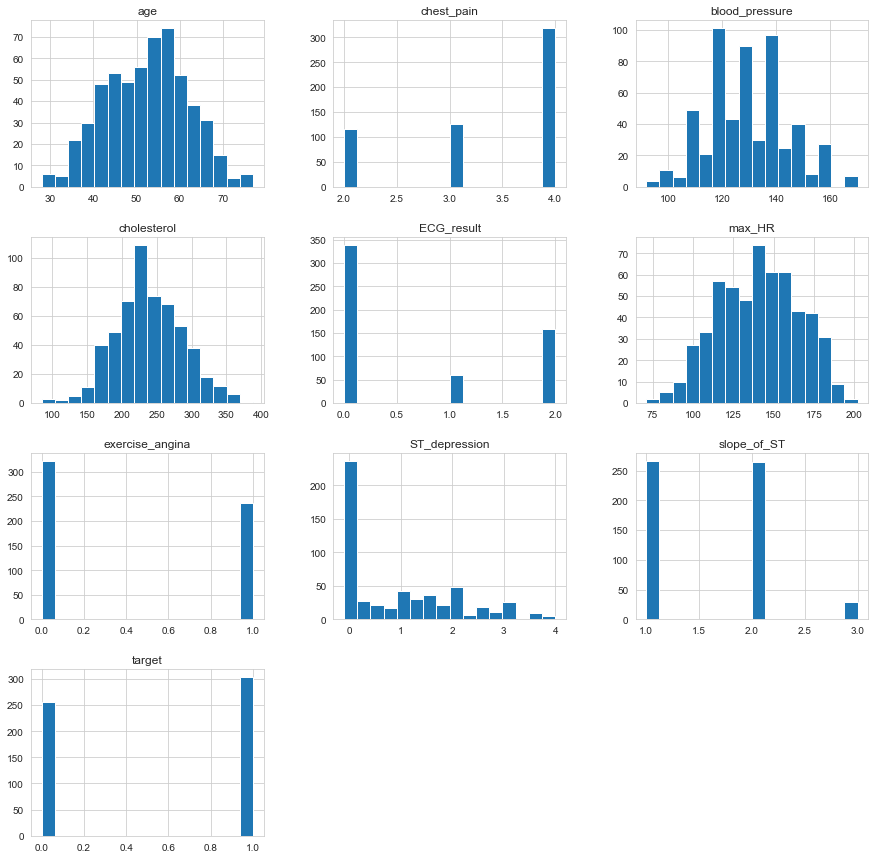

In [285]:
dframe.hist(bins=16, figsize=(15, 15))

All the features are important except sex and blood_sugar

In [282]:
dframe.drop(columns = ['sex','blood_sugar'], inplace=True)

## Functions

In [286]:
def measures(predictor):

    result = confusion_matrix(y_test, predictor)
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(y_test, predictor)
    print("Classification Report:",)
    print (result1)
    result2 = accuracy_score(y_test, predictor)
    print("Accuracy:",result2)

In [287]:
def cv_score(object):
    score=cross_val_score(object,X_train,y_train,cv=10)
    print('Mean score =', score.mean())

In [288]:
def ROC(object):
    #ROC_curve
    y_pred_proba = object.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    #ROC-AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    print('ROC-AUC: ', auc)
    
    #Plot curve
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve')
    plt.show()

## Model Selection

### Import the libraries

In [289]:
import pickle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**Encoding categorical features**

In [290]:
#Encoding

dframe = pd.get_dummies(dframe, columns = ['chest_pain', 'ECG_result', 'exercise_angina', 'slope_of_ST'])

Train_Test_Split

In [291]:
X = dframe.drop(['target'], axis = 1)
y = dframe['target']

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 7)

### Feature Scaling

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
_Perform scaling for scalars and encoding for categorical features_

In [293]:
#Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

columns_to_scale = ['age', 'blood_pressure', 'cholesterol', 'max_HR', 'ST_depression']
X_train[columns_to_scale] = sc_X.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = sc_X.transform(X_test[columns_to_scale])

In [294]:
dframe.head()

,age,blood_pressure,cholesterol,max_HR,ST_depression,target,chest_pain_2,chest_pain_3,chest_pain_4,ECG_result_0,ECG_result_1,ECG_result_2,exercise_angina_0,exercise_angina_1,slope_of_ST_1,slope_of_ST_2,slope_of_ST_3
0,40,140,289,172,0.0,0,1,0,0,1,0,0,1,0,1,0,0
2,37,130,283,98,0.0,0,1,0,0,0,1,0,1,0,1,0,0
4,54,150,195,122,0.0,0,0,1,0,1,0,0,1,0,1,0,0
5,39,120,339,170,0.0,0,0,1,0,1,0,0,1,0,1,0,0
7,54,110,208,142,0.0,0,1,0,0,1,0,0,1,0,1,0,0


In [295]:
Encoded = dframe.to_csv('encoded.csv')

In [296]:
X_train.head()

,age,blood_pressure,cholesterol,max_HR,ST_depression,chest_pain_2,chest_pain_3,chest_pain_4,ECG_result_0,ECG_result_1,ECG_result_2,exercise_angina_0,exercise_angina_1,slope_of_ST_1,slope_of_ST_2,slope_of_ST_3
713,1.457346,-0.664129,1.396044,0.400292,-0.502772,0,0,1,0,0,1,1,0,0,1,0
523,-0.207280,1.024352,2.400393,-0.856362,0.057030,0,0,1,0,0,1,0,1,1,0,0
177,0.208876,0.742939,-0.441702,-1.464420,0.523532,0,0,1,1,0,0,1,0,0,1,0
240,-0.415358,2.150006,-0.933192,-1.586031,1.923038,0,0,1,1,0,0,0,1,0,1,0
24,-1.247671,0.039405,-0.463071,-0.126692,-0.875974,0,1,0,1,0,0,1,0,1,0,0


## Logistic Regression

In [297]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [298]:
cv_score(lr_classifier)

Mean score = 0.8567307692307693


In [299]:
y_pred_lr = lr_classifier.predict(X_test)

In [300]:
measures(y_pred_lr)

Confusion Matrix:
[[55 18]
 [12 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79        73
           1       0.82      0.87      0.85        95

    accuracy                           0.82       168
   macro avg       0.82      0.81      0.82       168
weighted avg       0.82      0.82      0.82       168

Accuracy: 0.8214285714285714


ROC-AUC:  0.8992069214131219


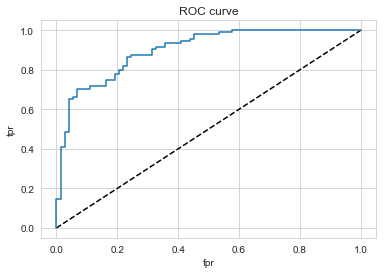

In [301]:
ROC(lr_classifier)

## Decision Tree Classifier

In [302]:
dt_classifier = DecisionTreeClassifier(random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [303]:
cv_score(dt_classifier)

Mean score = 0.8516666666666666


In [304]:
y_pred_dt = dt_classifier.predict(X_test)

In [305]:
measures(y_pred_dt)

Confusion Matrix:
[[61 12]
 [ 7 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        73
           1       0.88      0.93      0.90        95

    accuracy                           0.89       168
   macro avg       0.89      0.88      0.88       168
weighted avg       0.89      0.89      0.89       168

Accuracy: 0.8869047619047619


ROC-AUC:  0.8809661139149243


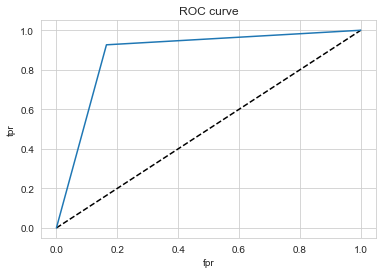

In [306]:
ROC(dt_classifier)

## Random Forest Classifer

In [307]:
rf_classifier = RandomForestClassifier(criterion = 'entropy', random_state = 7)
parameters = {'n_estimators' :np.arange(10,110,10)}
rf_classifier = RandomizedSearchCV(rf_classifier, parameters, cv=10)
rf_classifier.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=7),
                   param_distributions={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])})

In [308]:
print(rf_classifier.best_params_)

{'n_estimators': 40}


In [309]:
cv_score(rf_classifier)

Mean score = 0.9103846153846155


In [233]:
y_pred_rf = rf_classifier.predict(X_test)

In [310]:
measures(y_pred_rf)

Confusion Matrix:
[[62 11]
 [ 2 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        73
           1       0.89      0.98      0.93        95

    accuracy                           0.92       168
   macro avg       0.93      0.91      0.92       168
weighted avg       0.93      0.92      0.92       168

Accuracy: 0.9226190476190477


ROC-AUC:  0.9638788752703678


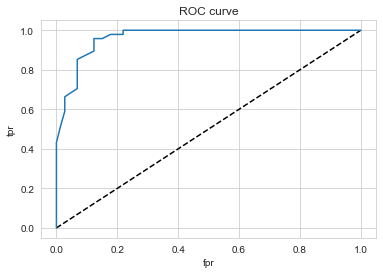

In [311]:
ROC(rf_classifier)

## KNN classifier

In [312]:
knn_classifier = KNeighborsClassifier()
parameters = {'n_neighbors' :np.arange(21)}
knn_classifier = RandomizedSearchCV(knn_classifier, parameters, cv=10)
knn_classifier.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [313]:
print(knn_classifier.best_params_)

{'n_neighbors': 19}


In [314]:
cv_score(knn_classifier)

Mean score = 0.8413461538461539


In [315]:
y_pred_knn = knn_classifier.predict(X_test)

In [316]:
measures(y_pred_knn)

Confusion Matrix:
[[54 19]
 [14 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77        73
           1       0.81      0.85      0.83        95

    accuracy                           0.80       168
   macro avg       0.80      0.80      0.80       168
weighted avg       0.80      0.80      0.80       168

Accuracy: 0.8035714285714286


ROC-AUC:  0.9155010814708003


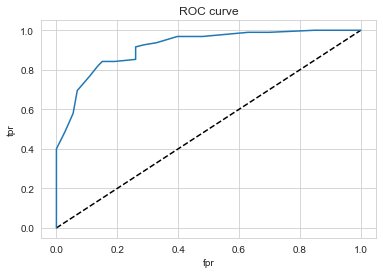

In [317]:
ROC(knn_classifier)

## Naive Bayes Classifier

In [318]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [319]:
cv_score(nb_classifier)

Mean score = 0.8259615384615383


In [320]:
y_pred_nb = nb_classifier.predict(X_test)

In [321]:
measures(y_pred_nb)

Confusion Matrix:
[[52 21]
 [ 8 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        73
           1       0.81      0.92      0.86        95

    accuracy                           0.83       168
   macro avg       0.84      0.81      0.82       168
weighted avg       0.83      0.83      0.82       168

Accuracy: 0.8273809523809523


ROC-AUC:  0.9002162941600577


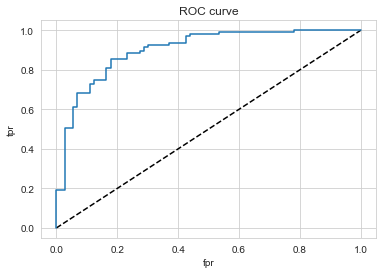

In [322]:
ROC(nb_classifier)

## Support Vector Machine

In [323]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [324]:
cv_score(svm_classifier)

Mean score = 0.8566666666666667


In [325]:
y_pred_svm = svm_classifier.predict(X_test)

In [326]:
measures(y_pred_svm)

Confusion Matrix:
[[56 17]
 [12 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        73
           1       0.83      0.87      0.85        95

    accuracy                           0.83       168
   macro avg       0.83      0.82      0.82       168
weighted avg       0.83      0.83      0.83       168

Accuracy: 0.8273809523809523


## Save the model

In [327]:
filename = 'rf_classifier_heart.pkl'
pickle.dump(rf_classifier, open(filename, 'wb'))

In [330]:
temp_array = [40,140,289,172,0.0,1,0,0,1,0,0,1,0,1,0,0]
temp_array5 = [49,140,234,140,1.0,0,0,1,1,0,0,0,1,0,1,0]
data = np.array([temp_array5])
my_prediction = int(rf_classifier.predict(data))
my_prediction

1